# Elliptical harmonic oscillator with interacting gaussians

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tqdm

from vmc.interface import PyEllipticalHarmonicOscillator, PyMetropolisAlgorithm, \
    PyInteractingEllipticalGaussian, PySampler
from vmc import run_experiment

from IPython.core.pylabtools import figsize
from IPython.core.display import display

In [2]:
sns.set(color_codes=True)

In [3]:
mass = 1.0
omega = 1.0
hbar = 1.0

radius = 0.043
beta = _lambda = 2.82843

num_particles = 5
num_dimensions = 3

step_length = 1.0
num_thermalization_steps = 0
num_samples = int(1e6)
num_local_energies = 0

alpha_min = 0.2
alpha_max = 0.9
num_alphas = 29

parameter_names = ["alpha"]

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)

kwargs = {
    "num_samples": num_samples, "step_length": step_length,
    "num_thermalization_steps": num_thermalization_steps}

In [4]:
wavefunction = PyInteractingEllipticalGaussian(
    num_particles, num_dimensions, mass, omega, beta, radius, spread=step_length)
solver = PyMetropolisAlgorithm(num_particles)
hamiltonian = PyEllipticalHarmonicOscillator(_lambda)

sampler = PySampler(wavefunction, hamiltonian, solver, num_local_energies)

In [5]:
df = run_experiment(sampler, wavefunction, alphas, parameter_names, **kwargs)

100%|██████████| 29/29 [00:28<00:00,  1.01it/s]


In [6]:
display(df)

,alpha,energy,variance,acceptance
0,0.200,18.029755,28.301908,0.600858
1,0.225,16.592299,19.820628,0.580328
2,0.250,15.581339,14.472652,0.560176
3,0.275,14.817415,10.175767,0.542502
4,0.300,14.150794,7.077366,0.525259
5,0.325,13.701522,4.914981,0.510210
6,0.350,13.338980,3.294917,0.495522
7,0.375,13.084024,2.095218,0.481412
8,0.400,12.886810,1.242883,0.468188
9,0.425,12.752763,0.639941,0.455218


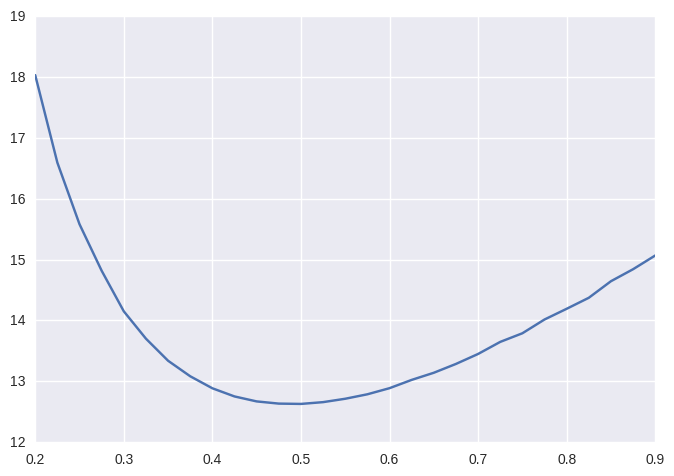

In [7]:
plt.plot(df["alpha"], df["energy"])
plt.show()

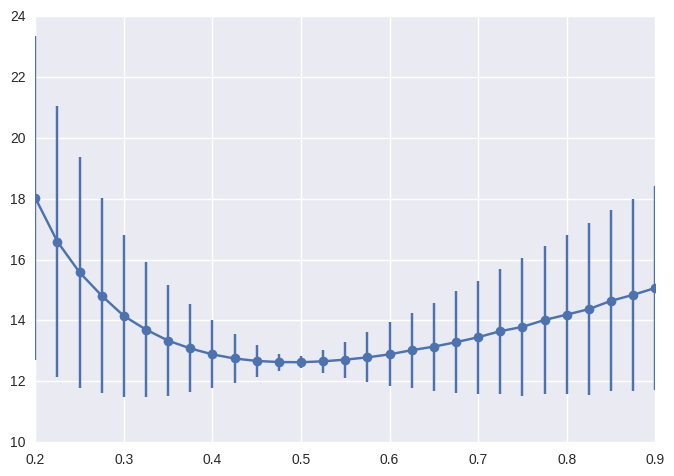

In [8]:
plt.errorbar(
    df["alpha"], df["energy"],
    yerr=np.sqrt(df["variance"]),
    label="analytical", fmt="o-")
plt.show()